# 악성사이트 탐지 머신러닝 모델 개발

# 1. 데이터 전처리

In [2]:
import pandas as pd
import numpy as np

In [9]:
train = pd.read_csv('train.csv')

In [10]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [11]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [12]:
#중복데이터 삭제
train = train.drop_duplicates()

In [13]:
# series.copy() 로 복사하여 새로운 컬럼을 생성
train['label_binary'] = (train['label']).copy()

# 'benign'은 0으로 'malicious'은 1로 변경
train['label_binary'] = train['label_binary'].map({'malicious':1, 'benign':0})

In [14]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

In [16]:
#결측치 제거 -선형보간법

train.interpolate(method='linear', inplace=True)


In [18]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0


In [19]:
# 모델링 하려면 숫자형이여야함 -> label 삭제
train.drop('label', axis=1, inplace=True)
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0


# 2. 시각화

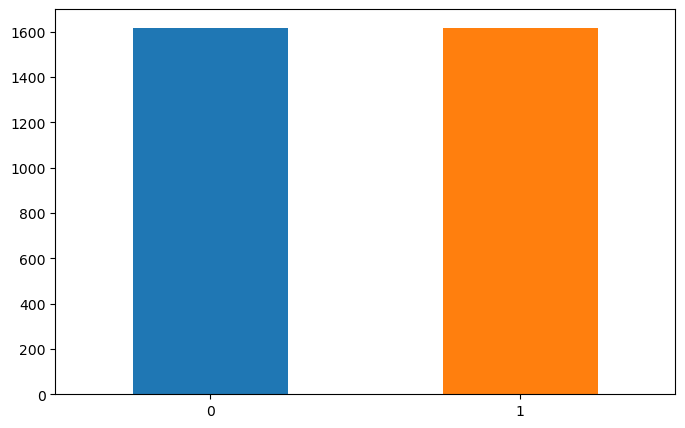

In [57]:
# Target 변수 값 분포 확인

cmap = plt.get_cmap('tab10')
plt.figure(figsize=(8, 5))
train['label_binary'].value_counts().plot(kind='bar', color=[cmap(0), cmap(1)])
plt.xticks(rotation=0)
plt.show()


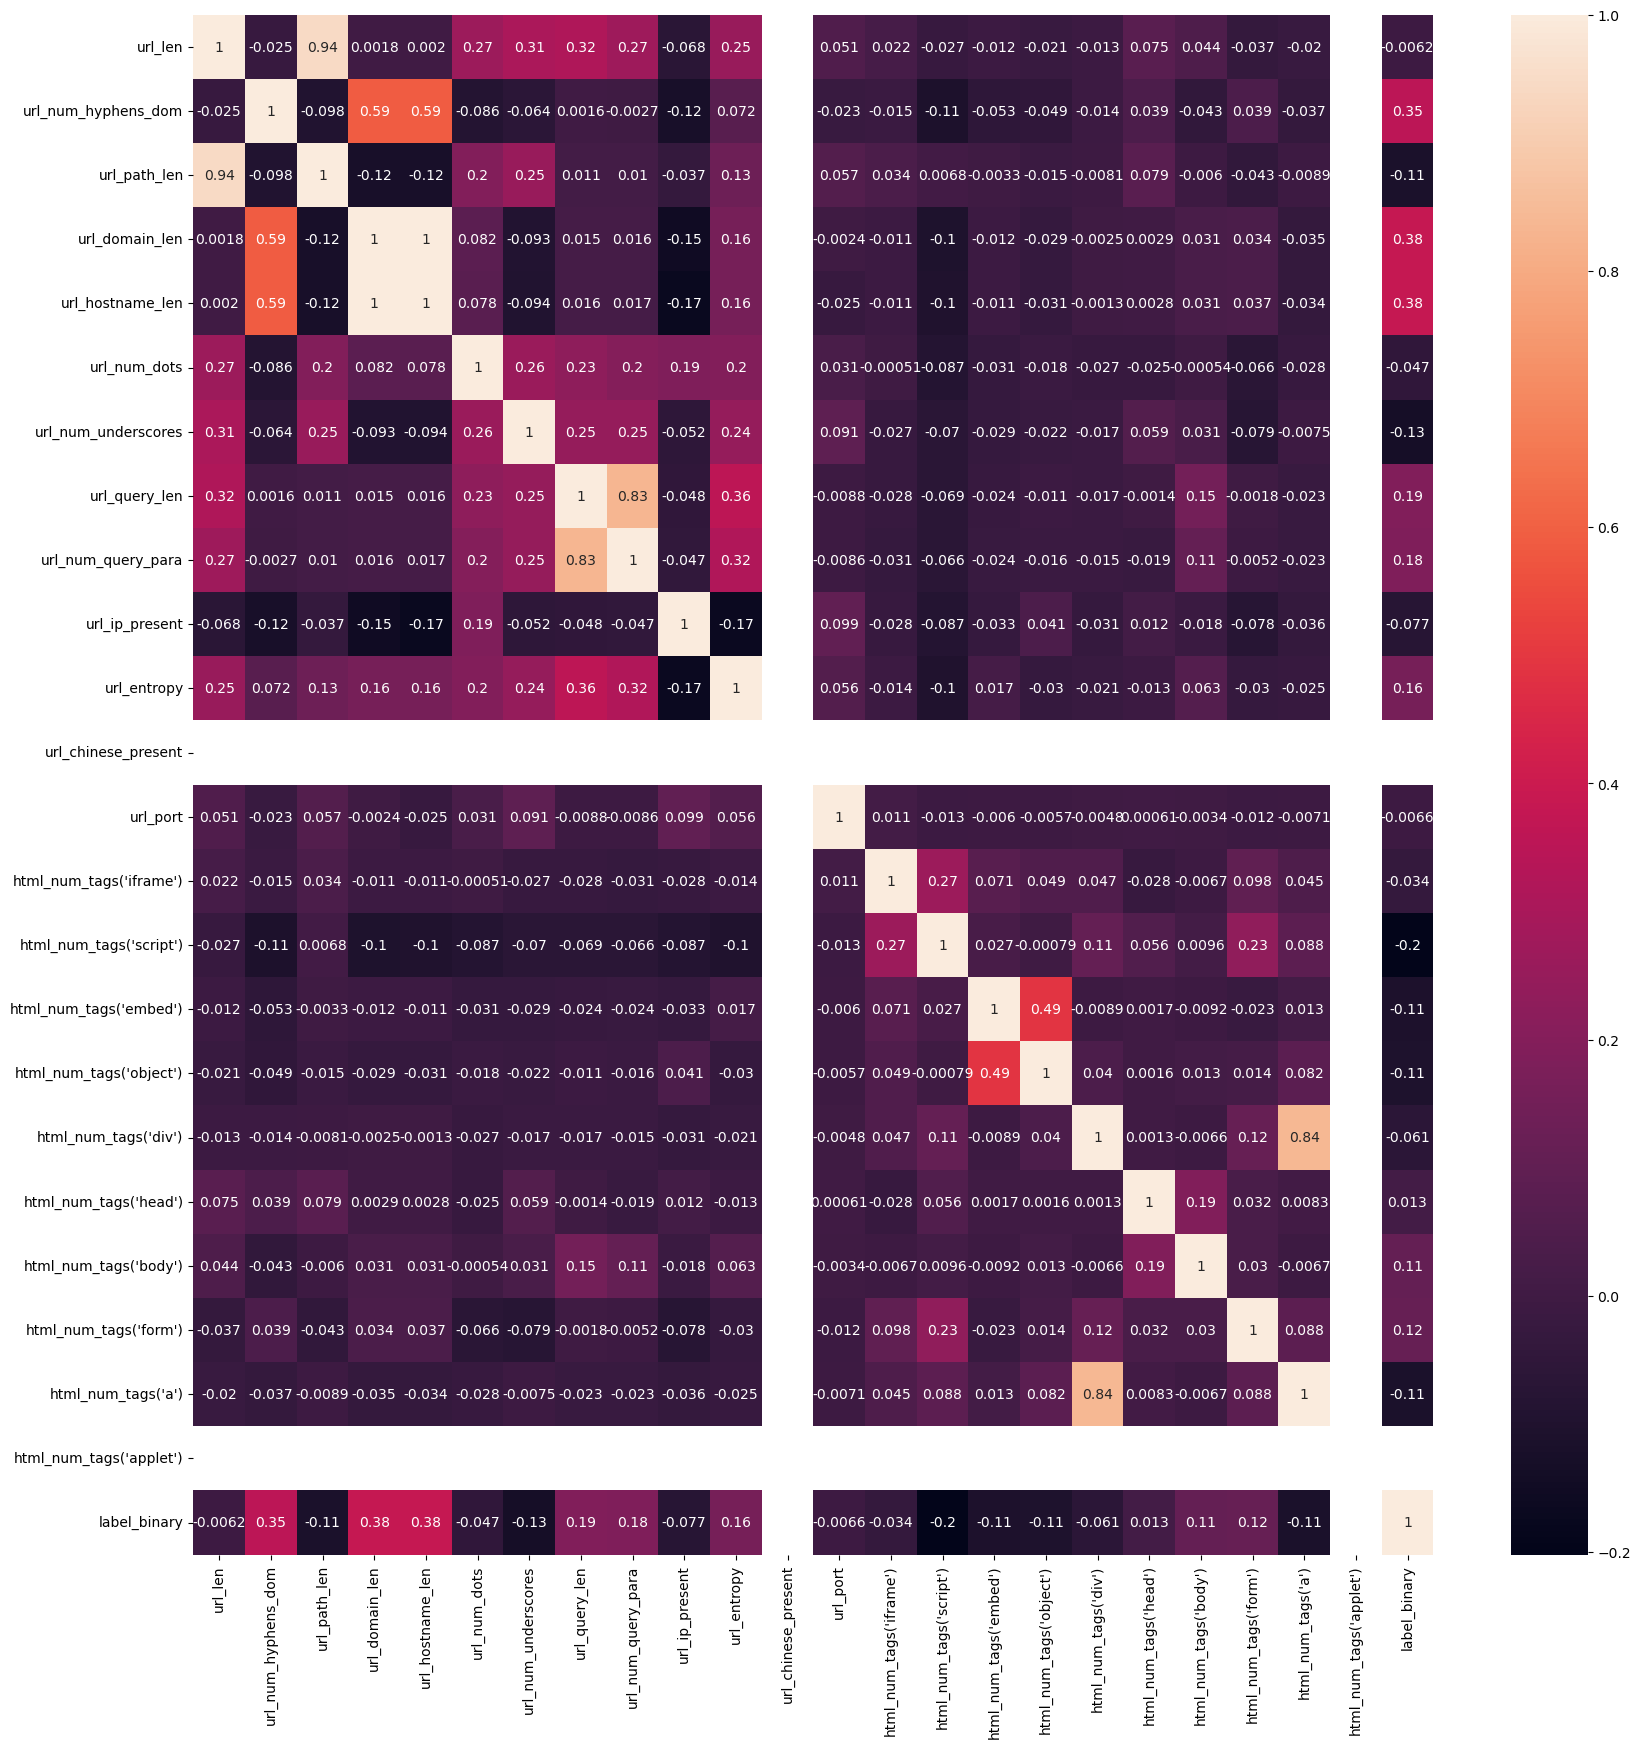

In [65]:
# 상관관계 시각화
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True)
plt.show()

# 3. 모델링

In [22]:
# 모듈 불러오기

!pip install tensorflow
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *

In [23]:
# x, y 나누기
target = 'label_binary'
x = train.drop(target, axis=1)
y = train.loc[:, target]

# train_test_split을 이용하여 train/test 데이터 분리
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y ,test_size=0.3, random_state=1 )

1) KNN

In [24]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x, train_y)

KNeighborsClassifier()

In [25]:
pred_y = model.predict(test_x)

In [26]:
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[443  42]
 [ 74 411]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       485
           1       0.91      0.85      0.88       485

    accuracy                           0.88       970
   macro avg       0.88      0.88      0.88       970
weighted avg       0.88      0.88      0.88       970



2) Decision Tree

In [27]:
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [28]:
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [29]:
pred_y = model.predict(test_x)

In [30]:
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[445  40]
 [ 54 431]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       485
           1       0.92      0.89      0.90       485

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970



3) Logistic Regression

In [31]:
model = LogisticRegression()
model.fit(train_x, train_y)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred_y = model.predict(test_x)

In [33]:
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[424  61]
 [105 380]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       485
           1       0.86      0.78      0.82       485

    accuracy                           0.83       970
   macro avg       0.83      0.83      0.83       970
weighted avg       0.83      0.83      0.83       970



4) SVM

In [34]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1, random_state=1)

In [35]:
model.fit(train_x, train_y)

SVC(C=1, kernel='linear', random_state=1)

In [36]:
pred_y = model.predict(test_x)

In [37]:
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[436  49]
 [ 80 405]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       485
           1       0.89      0.84      0.86       485

    accuracy                           0.87       970
   macro avg       0.87      0.87      0.87       970
weighted avg       0.87      0.87      0.87       970



5) Random Forest

In [39]:
model = RandomForestClassifier(max_depth=5, random_state=1)

In [40]:
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=5, random_state=1)

In [41]:
pred_y = model.predict(test_x)

In [42]:
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[445  40]
 [ 45 440]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       485
           1       0.92      0.91      0.91       485

    accuracy                           0.91       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.91      0.91      0.91       970



6) XGBoost

In [43]:
model = XGBClassifier(max_depth=5, random_state=1)

In [44]:
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [45]:
pred_y = model.predict(test_x)

In [46]:
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[462  23]
 [ 20 465]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       485
           1       0.95      0.96      0.96       485

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



7) LightGBM

In [47]:
model = LGBMClassifier(max_depth=5, random_state=1)

In [48]:
model.fit(train_x, train_y)

LGBMClassifier(max_depth=5, random_state=1)

In [49]:
pred_y = model.predict(test_x)

In [50]:
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[464  21]
 [ 25 460]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       485
           1       0.96      0.95      0.95       485

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



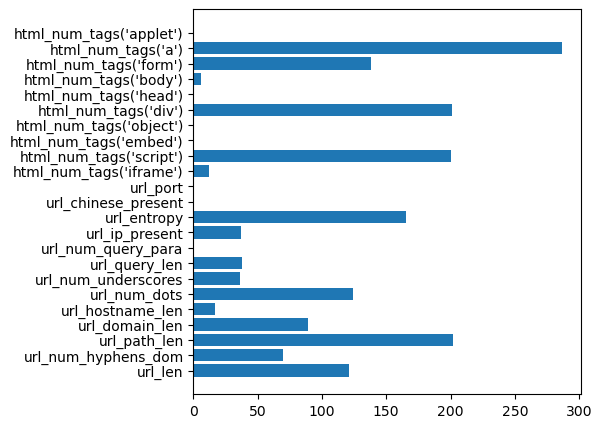

In [52]:
# feature 중요도 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.barh(list(x), model.feature_importances_)
plt.show()